<a href="https://colab.research.google.com/github/hasanyusuf01/Codes/blob/cyber-security/malware_detection_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as nm
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
import matplotlib as plt

In [14]:
df=pd.read_csv('/content/drive/MyDrive/Projects/android malware /train.csv') # loding training data 
df2=pd.read_csv('/content/drive/MyDrive/Projects/android malware /x_test.csv') # loding testing data 
df3=pd.read_csv('/content/drive/MyDrive/Projects/android malware /y_test.csv') # loding training data 

In [15]:
df

,READ_EXTERNAL_STORAGE,RECEIVE_BOOT_COMPLETED,WRITE_CONTACTS,RECORD_AUDIO,ACCESS_CACHE_FILESYSTEM,RECEIVE,BILLING,READ,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_FINE_LOCATION,...,CHANGE_WIFI_STATE,MODIFY_AUDIO_SETTINGS,BLUETOOTH_ADMIN,RECEIVE_SMS,ACCESS_MTK_MMHW,UNINSTALL_SHORTCUT,READ_INTERNAL_STORAGE,ACCESS_COARSE_LOCATION,Malicious,id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,7032
1,0,1,0,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,True,11026
2,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,0,0,1,True,9772
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,False,844
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,True,14630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,1,1,0,0,1,0,0,0,1,1,...,1,0,0,1,1,0,1,1,True,10551
5650,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,True,10781
5651,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,False,10691
5652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,True,16136


In [16]:
df2

,READ_EXTERNAL_STORAGE,RECEIVE_BOOT_COMPLETED,WRITE_CONTACTS,RECORD_AUDIO,ACCESS_CACHE_FILESYSTEM,RECEIVE,BILLING,READ,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_FINE_LOCATION,...,INTERACT_ACROSS_USERS_FULL,CHANGE_WIFI_STATE,MODIFY_AUDIO_SETTINGS,BLUETOOTH_ADMIN,RECEIVE_SMS,ACCESS_MTK_MMHW,UNINSTALL_SHORTCUT,READ_INTERNAL_STORAGE,ACCESS_COARSE_LOCATION,id
0,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6090
1,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,16279
2,0,1,1,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,1,4416
3,1,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,15152
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,13377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,16662
2420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13987
2421,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5546
2422,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2100


In [17]:
df3


,id,Malicious
0,6090,False
1,16279,True
2,4416,False
3,15152,True
4,13377,False
5,10412,False
6,3842,False
7,14752,True
8,15404,True
9,632,False


In [18]:
x_train = df.drop(['id'], axis=1) # droping the id column

In [19]:
x_train = x_train.drop(['Malicious'], axis=1)


In [20]:
x_test = df2.drop(['id'], axis=1) # droping the id column

In [21]:
x_test

,READ_EXTERNAL_STORAGE,RECEIVE_BOOT_COMPLETED,WRITE_CONTACTS,RECORD_AUDIO,ACCESS_CACHE_FILESYSTEM,RECEIVE,BILLING,READ,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_FINE_LOCATION,...,WRITE_APN_SETTINGS,INTERACT_ACROSS_USERS_FULL,CHANGE_WIFI_STATE,MODIFY_AUDIO_SETTINGS,BLUETOOTH_ADMIN,RECEIVE_SMS,ACCESS_MTK_MMHW,UNINSTALL_SHORTCUT,READ_INTERNAL_STORAGE,ACCESS_COARSE_LOCATION
0,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
2,0,1,1,1,0,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,1
3,1,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2421,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2422,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
x_train

,READ_EXTERNAL_STORAGE,RECEIVE_BOOT_COMPLETED,WRITE_CONTACTS,RECORD_AUDIO,ACCESS_CACHE_FILESYSTEM,RECEIVE,BILLING,READ,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_FINE_LOCATION,...,WRITE_APN_SETTINGS,INTERACT_ACROSS_USERS_FULL,CHANGE_WIFI_STATE,MODIFY_AUDIO_SETTINGS,BLUETOOTH_ADMIN,RECEIVE_SMS,ACCESS_MTK_MMHW,UNINSTALL_SHORTCUT,READ_INTERNAL_STORAGE,ACCESS_COARSE_LOCATION
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,1,0,1,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,1,1,0,0,1,0,0,0,1,1,...,1,1,1,0,0,1,1,0,1,1
5650,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5651,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
x_test 


,READ_EXTERNAL_STORAGE,RECEIVE_BOOT_COMPLETED,WRITE_CONTACTS,RECORD_AUDIO,ACCESS_CACHE_FILESYSTEM,RECEIVE,BILLING,READ,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_FINE_LOCATION,...,WRITE_APN_SETTINGS,INTERACT_ACROSS_USERS_FULL,CHANGE_WIFI_STATE,MODIFY_AUDIO_SETTINGS,BLUETOOTH_ADMIN,RECEIVE_SMS,ACCESS_MTK_MMHW,UNINSTALL_SHORTCUT,READ_INTERNAL_STORAGE,ACCESS_COARSE_LOCATION
0,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
2,0,1,1,1,0,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,1
3,1,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2421,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2422,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [25]:
x_train.shape

(5654, 70)

In [26]:
x_test.values

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
y_train = df.filter(['Malicious'])

In [28]:
y_test = df3.drop(['id'], axis=1)

In [29]:
y_train

,Malicious
0,False
1,True
2,True
3,False
4,True
...,...
5649,True
5650,True
5651,False
5652,True


In [30]:
y_test

,Malicious
0,False
1,True
2,False
3,True
4,False
5,False
6,False
7,True
8,True
9,False


In [31]:
import numpy as np
y_train.loc[y_train['Malicious'] == 'False', 'Malicious'] = 0
y_train.loc[y_train['Malicious'] == 'True', 'Malicious'] = 1
y_train = np.array(y_train['Malicious'], dtype=np.float)
y_test.loc[y_test['Malicious'] == 'False', 'Malicious'] = 0
y_test.loc[y_test['Malicious'] == 'True', 'Malicious'] = 1
y_test = np.array(y_test['Malicious'], dtype=np.float)

<ipython-input-31-1aea9561f4b9>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.array(y_train['Malicious'], dtype=np.float)
<ipython-input-31-1aea9561f4b9>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test = np.array(y_test['Malicious'], dtype=np.float)


In [32]:
y_train
#x_train = np.array(x_train['Malicious'], dtype=np.float)


array([0., 1., 1., ..., 0., 1., 1.])

In [33]:
y_test

array([0., 1., 0., 1., 0., 0., 0., 1., 1., 0.])

In [34]:
model= Sequential()
model.add(Flatten(input_shape=(70,)))
model.add(Dense(360, activation='relu')),
model.add(Dropout(0.2)),
model.add(BatchNormalization(axis=1)),
model.add(Dense(180, activation='relu')),
model.add(BatchNormalization(axis=1)),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 70)                0         
                                                                 
 dense (Dense)               (None, 360)               25560     
                                                                 
 dropout (Dropout)           (None, 360)               0         
                                                                 
 batch_normalization (BatchN  (None, 360)              1440      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 180)               64980     
                                                                 
 batch_normalization_1 (Batc  (None, 180)              720       
 hNormalization)                                        

In [36]:
history=model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])## not hotfunction ##categorial columns

In [37]:
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
142/142 [==============================] - 3s 8ms/step - loss: 0.2026 - accuracy: 0.9186 - val_loss: 0.2787 - val_accuracy: 0.9425
Epoch 2/25
142/142 [==============================] - 1s 6ms/step - loss: 0.1403 - accuracy: 0.9456 - val_loss: 0.1463 - val_accuracy: 0.9505
Epoch 3/25
142/142 [==============================] - 1s 6ms/step - loss: 0.1175 - accuracy: 0.9573 - val_loss: 0.1171 - val_accuracy: 0.9505
Epoch 4/25
142/142 [==============================] - 1s 6ms/step - loss: 0.1057 - accuracy: 0.9591 - val_loss: 0.1177 - val_accuracy: 0.9558
Epoch 5/25
142/142 [==============================] - 1s 6ms/step - loss: 0.0925 - accuracy: 0.9651 - val_loss: 0.1173 - val_accuracy: 0.9567
Epoch 6/25
142/142 [==============================] - 1s 7ms/step - loss: 0.0886 - accuracy: 0.9657 - val_loss: 0.1240 - val_accuracy: 0.9514
Epoch 7/25
142/142 [==============================] - 1s 9ms/step - loss: 0.0829 - accuracy: 0.9706 - val_loss: 0.1192 - val_accuracy: 0.9514
Epoch 

In [38]:
from matplotlib import pyplot as pl

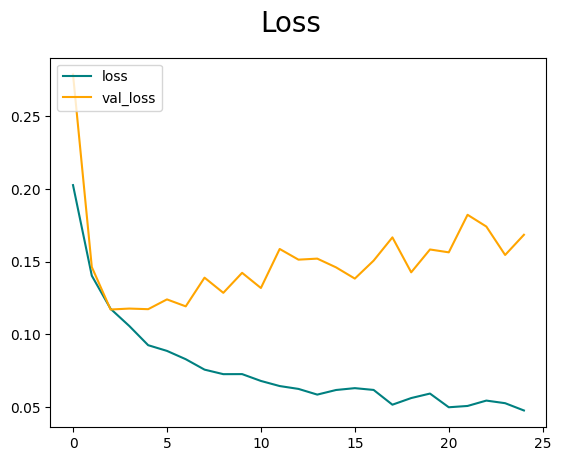

In [39]:
fig = pl.figure()
pl.plot(history.history['loss'], color='teal', label='loss')
pl.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
pl.legend(loc="upper left")
pl.show()

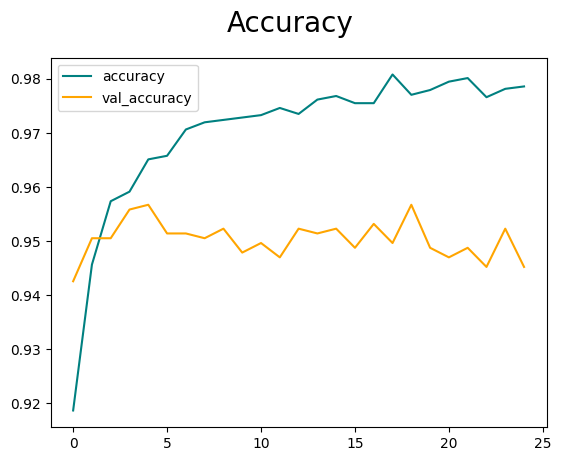

In [40]:
fig = pl.figure()
pl.plot(history.history['accuracy'], color='teal', label='accuracy')
pl.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
pl.legend(loc="upper left")
pl.show()